# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

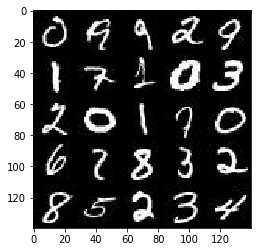

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

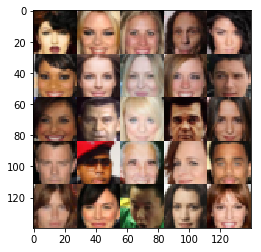

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    z_data = tf.placeholder(tf.float32, (None, z_dim), name='z_dim')
    learning_rate = tf.placeholder(tf.float32, None,  name='learning_rate')
    return (input_real, z_data, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        #initial 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        #14x14x7
        

        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        #7x7x128
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same')
        bn3= tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * x3, x3)
        #4x4x256
        
        #x4 = tf.layers.conv2d(relu3, 1024, 5, strides=2, padding='same')
        #bn4= tf.layers.batch_normalization(x3, training=True)
        #relu4 = tf.maximum(alpha * x4, x4)
        #4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits) 
   
        #print(images.get_shape())
        #print(x1.get_shape())
        #print(x2.get_shape())
        #print(x3.get_shape())
        #print(x4.get_shape())
        #print(logits.get_shape())

        return output,logits 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        alpha = 0.2
        x1 = tf.layers.dense(z, 4*4*512)
        
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)

        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        #x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        #x4 = tf.layers.conv2d_transpose(x3, 64, 5, 2, 'same')
        #x4 = tf.layers.batch_normalization(x4, training=is_train)
        #x4 = tf.maximum(alpha * x4, x4)   

        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
        
        #print(z.get_shape())
        #print(x1.get_shape())
        #print(x2.get_shape())
        #print(x3.get_shape())
        #print(x4.get_shape())
        #print(logits.get_shape())
        
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 5)
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 5)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 4)
(?, 28, 28, 4)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
(?, 28, 28, 4)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    saver = tf.train.Saver()    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images *= 2
                
                _ = sess.run(d_train_opt, feed_dict = {input_real: batch_images, input_z:batch_z, learn_rate: learning_rate})
                _ = sess.run(g_train_opt, feed_dict = {input_z : batch_z, learn_rate:learning_rate})
                                

                if steps % 10 == 0:    
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real:batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriinator Loss: {:.4f}".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
(?, 28, 28, 1)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
Epoch 0/2... Discriinator Loss: 1.2035 Generator Loss: 0.8218
Epoch 0/2... Discriinator Loss: 0.8145 Generator Loss: 1.1859
Epoch 0/2... Discriinator Loss: 0.5132 Generator Loss: 1.6585
Epoch 0/2... Discriinator Loss: 0.4527 Generator Loss: 1.1141
Epoch 0/2... Discriinator Loss: 0.7127 Generator Loss: 0.8827
Epoch 0/2... Discriinator Loss: 1.1642 Generator Loss: 0.4284
Epoch 0/2... Discriinator Loss: 1.0343 Generator Loss: 0.4915
Epoch 0/2... Discriinator Loss: 1.2974 Generator Loss: 0.3668
Epoch 0/2... Discriinator Loss: 0.8736 Generator Loss: 0.6421
Epoch 0/2... Discriinator Loss: 1.0552 Generator Loss: 0.5248
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


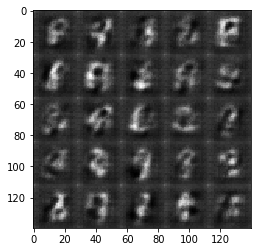

Epoch 0/2... Discriinator Loss: 1.3129 Generator Loss: 0.3624
Epoch 0/2... Discriinator Loss: 1.1038 Generator Loss: 0.4973
Epoch 0/2... Discriinator Loss: 1.0251 Generator Loss: 0.5479
Epoch 0/2... Discriinator Loss: 1.0723 Generator Loss: 0.5204
Epoch 0/2... Discriinator Loss: 1.1025 Generator Loss: 0.4959
Epoch 0/2... Discriinator Loss: 0.8745 Generator Loss: 0.7543
Epoch 0/2... Discriinator Loss: 0.7985 Generator Loss: 0.9438
Epoch 0/2... Discriinator Loss: 0.8625 Generator Loss: 0.8543
Epoch 0/2... Discriinator Loss: 1.4702 Generator Loss: 0.3348
Epoch 0/2... Discriinator Loss: 0.9993 Generator Loss: 0.6210
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


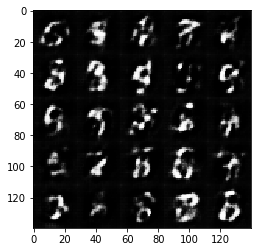

Epoch 0/2... Discriinator Loss: 0.9638 Generator Loss: 0.6802
Epoch 0/2... Discriinator Loss: 1.0376 Generator Loss: 0.6234
Epoch 0/2... Discriinator Loss: 1.0869 Generator Loss: 0.5282
Epoch 0/2... Discriinator Loss: 0.7279 Generator Loss: 1.0791
Epoch 0/2... Discriinator Loss: 0.9098 Generator Loss: 0.8138
Epoch 0/2... Discriinator Loss: 1.1037 Generator Loss: 0.5517
Epoch 0/2... Discriinator Loss: 0.8811 Generator Loss: 0.7645
Epoch 0/2... Discriinator Loss: 0.9754 Generator Loss: 0.6724
Epoch 0/2... Discriinator Loss: 0.8755 Generator Loss: 0.7557
Epoch 0/2... Discriinator Loss: 1.0064 Generator Loss: 0.6438
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


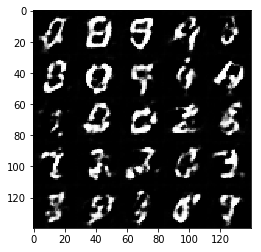

Epoch 0/2... Discriinator Loss: 1.1218 Generator Loss: 0.5492
Epoch 0/2... Discriinator Loss: 0.8410 Generator Loss: 1.7229
Epoch 0/2... Discriinator Loss: 0.8341 Generator Loss: 1.4260
Epoch 0/2... Discriinator Loss: 0.9149 Generator Loss: 1.8770
Epoch 0/2... Discriinator Loss: 0.9910 Generator Loss: 1.9842
Epoch 0/2... Discriinator Loss: 1.0072 Generator Loss: 1.8119
Epoch 0/2... Discriinator Loss: 0.8491 Generator Loss: 1.2658
Epoch 0/2... Discriinator Loss: 1.0242 Generator Loss: 1.5797
Epoch 0/2... Discriinator Loss: 0.8303 Generator Loss: 1.2491
Epoch 0/2... Discriinator Loss: 0.9470 Generator Loss: 1.4057
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


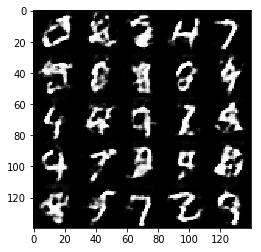

Epoch 0/2... Discriinator Loss: 0.8593 Generator Loss: 1.3392
Epoch 0/2... Discriinator Loss: 0.9261 Generator Loss: 1.2671
Epoch 0/2... Discriinator Loss: 1.0785 Generator Loss: 1.9727
Epoch 0/2... Discriinator Loss: 0.9807 Generator Loss: 1.7153
Epoch 0/2... Discriinator Loss: 0.9758 Generator Loss: 1.1842
Epoch 0/2... Discriinator Loss: 0.9860 Generator Loss: 1.8419
Epoch 1/2... Discriinator Loss: 0.9205 Generator Loss: 1.7559
Epoch 1/2... Discriinator Loss: 0.8425 Generator Loss: 1.3295
Epoch 1/2... Discriinator Loss: 1.2650 Generator Loss: 2.1324
Epoch 1/2... Discriinator Loss: 0.8949 Generator Loss: 1.3934
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


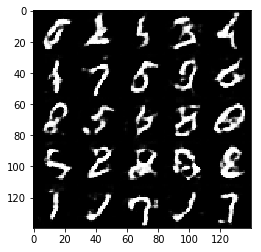

Epoch 1/2... Discriinator Loss: 1.0454 Generator Loss: 1.8843
Epoch 1/2... Discriinator Loss: 0.8869 Generator Loss: 1.4878
Epoch 1/2... Discriinator Loss: 0.9416 Generator Loss: 1.6929
Epoch 1/2... Discriinator Loss: 0.8317 Generator Loss: 1.0657
Epoch 1/2... Discriinator Loss: 1.1166 Generator Loss: 0.6193
Epoch 1/2... Discriinator Loss: 1.1259 Generator Loss: 0.6209
Epoch 1/2... Discriinator Loss: 1.0893 Generator Loss: 0.6442
Epoch 1/2... Discriinator Loss: 0.9597 Generator Loss: 0.7373
Epoch 1/2... Discriinator Loss: 1.1119 Generator Loss: 0.5903
Epoch 1/2... Discriinator Loss: 0.8733 Generator Loss: 0.8831
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


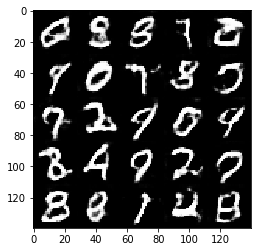

Epoch 1/2... Discriinator Loss: 1.1079 Generator Loss: 1.9221
Epoch 1/2... Discriinator Loss: 0.9485 Generator Loss: 1.5054
Epoch 1/2... Discriinator Loss: 1.0794 Generator Loss: 1.8967
Epoch 1/2... Discriinator Loss: 0.8240 Generator Loss: 1.4184
Epoch 1/2... Discriinator Loss: 0.8339 Generator Loss: 1.5233
Epoch 1/2... Discriinator Loss: 0.8671 Generator Loss: 1.2320
Epoch 1/2... Discriinator Loss: 1.1540 Generator Loss: 0.5532
Epoch 1/2... Discriinator Loss: 0.9659 Generator Loss: 0.7982
Epoch 1/2... Discriinator Loss: 0.9854 Generator Loss: 0.7535
Epoch 1/2... Discriinator Loss: 1.1580 Generator Loss: 0.5524
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


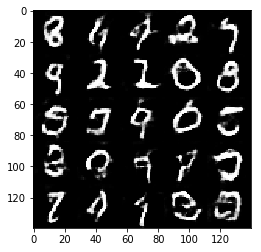

Epoch 1/2... Discriinator Loss: 0.9776 Generator Loss: 0.7075
Epoch 1/2... Discriinator Loss: 0.9916 Generator Loss: 0.7180
Epoch 1/2... Discriinator Loss: 1.0536 Generator Loss: 0.6162
Epoch 1/2... Discriinator Loss: 0.9983 Generator Loss: 0.7975
Epoch 1/2... Discriinator Loss: 0.8458 Generator Loss: 1.4906
Epoch 1/2... Discriinator Loss: 1.3793 Generator Loss: 1.6716
Epoch 1/2... Discriinator Loss: 0.8334 Generator Loss: 1.2897
Epoch 1/2... Discriinator Loss: 0.8640 Generator Loss: 1.5245
Epoch 1/2... Discriinator Loss: 0.8464 Generator Loss: 1.4733
Epoch 1/2... Discriinator Loss: 0.8646 Generator Loss: 1.5624
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


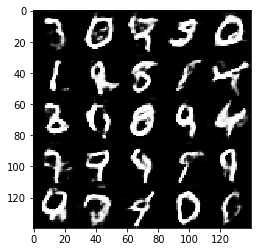

Epoch 1/2... Discriinator Loss: 0.8449 Generator Loss: 1.7792
Epoch 1/2... Discriinator Loss: 0.9068 Generator Loss: 0.9891
Epoch 1/2... Discriinator Loss: 0.8838 Generator Loss: 1.5288
Epoch 1/2... Discriinator Loss: 1.8630 Generator Loss: 2.4662
Epoch 1/2... Discriinator Loss: 0.8297 Generator Loss: 1.1303
Epoch 1/2... Discriinator Loss: 0.9002 Generator Loss: 0.8179
Epoch 1/2... Discriinator Loss: 0.9219 Generator Loss: 0.9674
Epoch 1/2... Discriinator Loss: 1.1248 Generator Loss: 0.6048
Epoch 1/2... Discriinator Loss: 1.1880 Generator Loss: 0.5497
Epoch 1/2... Discriinator Loss: 0.9563 Generator Loss: 0.7928
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 1)


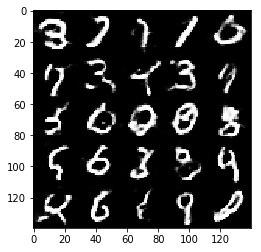

Epoch 1/2... Discriinator Loss: 1.0025 Generator Loss: 0.7043
Epoch 1/2... Discriinator Loss: 1.0274 Generator Loss: 0.7034
Epoch 1/2... Discriinator Loss: 0.9171 Generator Loss: 0.8763


In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)
(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
(?, 28, 28, 3)
(?, 14, 14, 64)
(?, 7, 7, 256)
(?, 4, 4, 512)
Epoch 0/1... Discriinator Loss: 0.5556 Generator Loss: 1.3599
Epoch 0/1... Discriinator Loss: 0.3497 Generator Loss: 4.1695
Epoch 0/1... Discriinator Loss: 0.3281 Generator Loss: 2.2961
Epoch 0/1... Discriinator Loss: 0.4007 Generator Loss: 1.8068
Epoch 0/1... Discriinator Loss: 1.9824 Generator Loss: 10.6110
Epoch 0/1... Discriinator Loss: 2.7901 Generator Loss: 0.0921
Epoch 0/1... Discriinator Loss: 0.3996 Generator Loss: 1.9355
Epoch 0/1... Discriinator Loss: 0.3627 Generator Loss: 2.0308
Epoch 0/1... Discriinator Loss: 0.2383 Generator Loss: 2.7505
Epoch 0/1... Discriinator Loss: 0.4756 Generator Loss: 1.5333
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


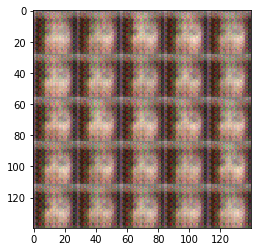

Epoch 0/1... Discriinator Loss: 0.4416 Generator Loss: 1.6486
Epoch 0/1... Discriinator Loss: 0.1752 Generator Loss: 2.3896
Epoch 0/1... Discriinator Loss: 0.3766 Generator Loss: 11.4526
Epoch 0/1... Discriinator Loss: 5.6802 Generator Loss: 0.0067
Epoch 0/1... Discriinator Loss: 0.1748 Generator Loss: 4.5731
Epoch 0/1... Discriinator Loss: 0.3727 Generator Loss: 10.0302
Epoch 0/1... Discriinator Loss: 0.4739 Generator Loss: 1.9512
Epoch 0/1... Discriinator Loss: 0.2705 Generator Loss: 2.2283
Epoch 0/1... Discriinator Loss: 0.3810 Generator Loss: 1.6566
Epoch 0/1... Discriinator Loss: 2.9775 Generator Loss: 13.0553
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


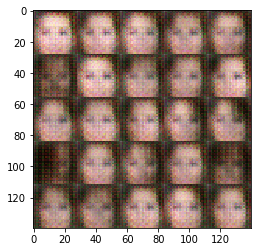

Epoch 0/1... Discriinator Loss: 0.5613 Generator Loss: 1.6319
Epoch 0/1... Discriinator Loss: 0.2702 Generator Loss: 2.4575
Epoch 0/1... Discriinator Loss: 0.1964 Generator Loss: 2.6034
Epoch 0/1... Discriinator Loss: 0.3969 Generator Loss: 2.6434
Epoch 0/1... Discriinator Loss: 0.3614 Generator Loss: 1.7577
Epoch 0/1... Discriinator Loss: 0.3241 Generator Loss: 2.1472
Epoch 0/1... Discriinator Loss: 0.8653 Generator Loss: 4.2714
Epoch 0/1... Discriinator Loss: 0.4537 Generator Loss: 3.2131
Epoch 0/1... Discriinator Loss: 0.4002 Generator Loss: 1.9134
Epoch 0/1... Discriinator Loss: 0.7392 Generator Loss: 1.0836
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


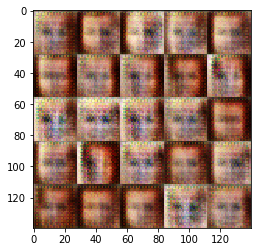

Epoch 0/1... Discriinator Loss: 0.6052 Generator Loss: 3.3732
Epoch 0/1... Discriinator Loss: 0.6977 Generator Loss: 1.4127
Epoch 0/1... Discriinator Loss: 0.3588 Generator Loss: 1.9831
Epoch 0/1... Discriinator Loss: 0.5986 Generator Loss: 1.7919
Epoch 0/1... Discriinator Loss: 0.5305 Generator Loss: 1.9635
Epoch 0/1... Discriinator Loss: 1.1395 Generator Loss: 0.7138
Epoch 0/1... Discriinator Loss: 0.5101 Generator Loss: 1.8605
Epoch 0/1... Discriinator Loss: 0.5617 Generator Loss: 2.1417
Epoch 0/1... Discriinator Loss: 0.5310 Generator Loss: 2.0516
Epoch 0/1... Discriinator Loss: 0.6955 Generator Loss: 1.4973
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


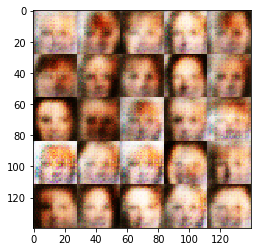

Epoch 0/1... Discriinator Loss: 0.8944 Generator Loss: 1.4545
Epoch 0/1... Discriinator Loss: 0.5990 Generator Loss: 1.7019
Epoch 0/1... Discriinator Loss: 0.9836 Generator Loss: 0.7064
Epoch 0/1... Discriinator Loss: 0.4032 Generator Loss: 2.7102
Epoch 0/1... Discriinator Loss: 0.5343 Generator Loss: 1.5166
Epoch 0/1... Discriinator Loss: 0.8428 Generator Loss: 0.9835
Epoch 0/1... Discriinator Loss: 0.9525 Generator Loss: 0.7726
Epoch 0/1... Discriinator Loss: 0.5629 Generator Loss: 1.9218
Epoch 0/1... Discriinator Loss: 0.5681 Generator Loss: 2.1831
Epoch 0/1... Discriinator Loss: 0.8531 Generator Loss: 2.6701
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


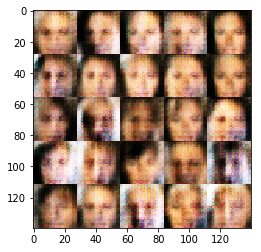

Epoch 0/1... Discriinator Loss: 0.8908 Generator Loss: 0.9772
Epoch 0/1... Discriinator Loss: 0.6788 Generator Loss: 1.7514
Epoch 0/1... Discriinator Loss: 0.5883 Generator Loss: 1.9640
Epoch 0/1... Discriinator Loss: 0.8144 Generator Loss: 2.2311
Epoch 0/1... Discriinator Loss: 0.7299 Generator Loss: 1.4696
Epoch 0/1... Discriinator Loss: 0.7760 Generator Loss: 1.3941
Epoch 0/1... Discriinator Loss: 0.8120 Generator Loss: 1.8961
Epoch 0/1... Discriinator Loss: 0.6840 Generator Loss: 1.5059
Epoch 0/1... Discriinator Loss: 0.9040 Generator Loss: 0.9244
Epoch 0/1... Discriinator Loss: 0.7839 Generator Loss: 2.5579
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


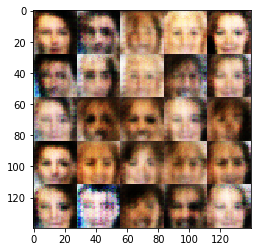

Epoch 0/1... Discriinator Loss: 0.7504 Generator Loss: 2.0618
Epoch 0/1... Discriinator Loss: 0.7336 Generator Loss: 1.3091
Epoch 0/1... Discriinator Loss: 0.7589 Generator Loss: 1.0902
Epoch 0/1... Discriinator Loss: 1.0053 Generator Loss: 0.7198
Epoch 0/1... Discriinator Loss: 1.6940 Generator Loss: 4.2114
Epoch 0/1... Discriinator Loss: 0.8034 Generator Loss: 1.8045
Epoch 0/1... Discriinator Loss: 0.6683 Generator Loss: 1.2795
Epoch 0/1... Discriinator Loss: 0.8451 Generator Loss: 0.9553
Epoch 0/1... Discriinator Loss: 1.5370 Generator Loss: 3.6974
Epoch 0/1... Discriinator Loss: 0.8498 Generator Loss: 1.0331
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


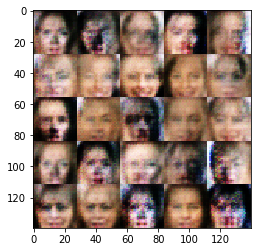

Epoch 0/1... Discriinator Loss: 0.6395 Generator Loss: 1.4340
Epoch 0/1... Discriinator Loss: 0.9776 Generator Loss: 0.7416
Epoch 0/1... Discriinator Loss: 0.9047 Generator Loss: 2.5601
Epoch 0/1... Discriinator Loss: 0.7858 Generator Loss: 1.3704
Epoch 0/1... Discriinator Loss: 1.4360 Generator Loss: 3.5324
Epoch 0/1... Discriinator Loss: 0.7586 Generator Loss: 1.1052
Epoch 0/1... Discriinator Loss: 0.6677 Generator Loss: 2.0383
Epoch 0/1... Discriinator Loss: 0.8394 Generator Loss: 1.0178
Epoch 0/1... Discriinator Loss: 1.0583 Generator Loss: 0.6360
Epoch 0/1... Discriinator Loss: 0.7929 Generator Loss: 1.1889
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


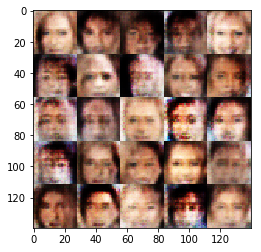

Epoch 0/1... Discriinator Loss: 0.8228 Generator Loss: 1.2299
Epoch 0/1... Discriinator Loss: 0.7441 Generator Loss: 2.8635
Epoch 0/1... Discriinator Loss: 0.8976 Generator Loss: 1.6730
Epoch 0/1... Discriinator Loss: 0.7403 Generator Loss: 1.3037
Epoch 0/1... Discriinator Loss: 0.8731 Generator Loss: 0.8773
Epoch 0/1... Discriinator Loss: 0.8801 Generator Loss: 0.9858
Epoch 0/1... Discriinator Loss: 0.8130 Generator Loss: 1.7709
Epoch 0/1... Discriinator Loss: 1.0419 Generator Loss: 2.3060
Epoch 0/1... Discriinator Loss: 0.8093 Generator Loss: 1.2735
Epoch 0/1... Discriinator Loss: 0.9702 Generator Loss: 2.5784
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


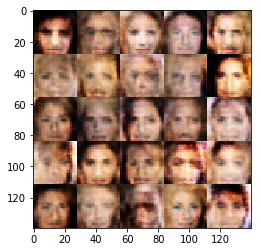

Epoch 0/1... Discriinator Loss: 0.7280 Generator Loss: 2.1983
Epoch 0/1... Discriinator Loss: 0.9332 Generator Loss: 1.0643
Epoch 0/1... Discriinator Loss: 1.0800 Generator Loss: 1.1426
Epoch 0/1... Discriinator Loss: 0.8760 Generator Loss: 1.3385
Epoch 0/1... Discriinator Loss: 0.8785 Generator Loss: 1.0473
Epoch 0/1... Discriinator Loss: 0.9618 Generator Loss: 0.9842
Epoch 0/1... Discriinator Loss: 1.0680 Generator Loss: 0.7202
Epoch 0/1... Discriinator Loss: 0.8820 Generator Loss: 1.2887
Epoch 0/1... Discriinator Loss: 1.0189 Generator Loss: 0.7090
Epoch 0/1... Discriinator Loss: 0.7457 Generator Loss: 1.1820
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


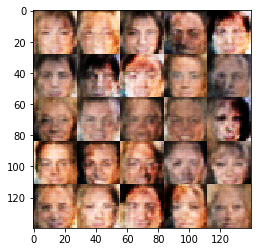

Epoch 0/1... Discriinator Loss: 1.3445 Generator Loss: 2.4917
Epoch 0/1... Discriinator Loss: 0.8645 Generator Loss: 1.2217
Epoch 0/1... Discriinator Loss: 1.0061 Generator Loss: 1.1131
Epoch 0/1... Discriinator Loss: 0.7347 Generator Loss: 1.4143
Epoch 0/1... Discriinator Loss: 1.3248 Generator Loss: 0.4489
Epoch 0/1... Discriinator Loss: 0.8108 Generator Loss: 1.5104
Epoch 0/1... Discriinator Loss: 0.8488 Generator Loss: 1.9226
Epoch 0/1... Discriinator Loss: 0.6858 Generator Loss: 1.1560
Epoch 0/1... Discriinator Loss: 1.3823 Generator Loss: 0.4602
Epoch 0/1... Discriinator Loss: 0.7889 Generator Loss: 1.4303
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


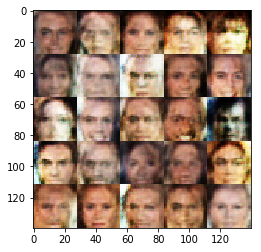

Epoch 0/1... Discriinator Loss: 0.9632 Generator Loss: 1.1553
Epoch 0/1... Discriinator Loss: 0.9606 Generator Loss: 1.0219
Epoch 0/1... Discriinator Loss: 1.1048 Generator Loss: 2.0931
Epoch 0/1... Discriinator Loss: 0.8397 Generator Loss: 1.1351
Epoch 0/1... Discriinator Loss: 0.9612 Generator Loss: 0.9234
Epoch 0/1... Discriinator Loss: 0.8810 Generator Loss: 1.4639
Epoch 0/1... Discriinator Loss: 0.7952 Generator Loss: 1.0793
Epoch 0/1... Discriinator Loss: 0.9139 Generator Loss: 1.5768
Epoch 0/1... Discriinator Loss: 0.8557 Generator Loss: 1.0176
Epoch 0/1... Discriinator Loss: 0.9854 Generator Loss: 0.7972
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


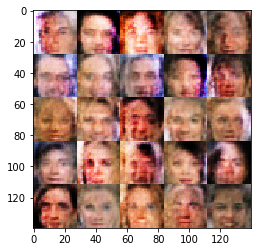

Epoch 0/1... Discriinator Loss: 0.8200 Generator Loss: 2.2128
Epoch 0/1... Discriinator Loss: 0.8953 Generator Loss: 1.0463
Epoch 0/1... Discriinator Loss: 0.9502 Generator Loss: 1.0319
Epoch 0/1... Discriinator Loss: 1.0104 Generator Loss: 2.2456
Epoch 0/1... Discriinator Loss: 1.0471 Generator Loss: 2.1727
Epoch 0/1... Discriinator Loss: 0.8162 Generator Loss: 0.9522
Epoch 0/1... Discriinator Loss: 1.0880 Generator Loss: 1.4130
Epoch 0/1... Discriinator Loss: 0.7604 Generator Loss: 1.3377
Epoch 0/1... Discriinator Loss: 1.0192 Generator Loss: 1.8450
Epoch 0/1... Discriinator Loss: 1.2893 Generator Loss: 2.5521
(?, 100)
(?, 4, 4, 512)
(?, 7, 7, 256)
(?, 14, 14, 64)
(?, 28, 28, 3)


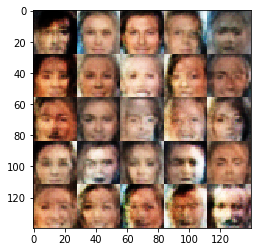

Epoch 0/1... Discriinator Loss: 1.0490 Generator Loss: 1.7352
Epoch 0/1... Discriinator Loss: 1.0001 Generator Loss: 0.7896
Epoch 0/1... Discriinator Loss: 0.8466 Generator Loss: 1.1772
Epoch 0/1... Discriinator Loss: 0.9046 Generator Loss: 1.4716
Epoch 0/1... Discriinator Loss: 0.8869 Generator Loss: 1.0532
Epoch 0/1... Discriinator Loss: 1.0796 Generator Loss: 2.0731
Epoch 0/1... Discriinator Loss: 1.0731 Generator Loss: 2.4530
Epoch 0/1... Discriinator Loss: 0.9000 Generator Loss: 1.2134
Epoch 0/1... Discriinator Loss: 0.8672 Generator Loss: 1.0803


In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.